# Raw analytics - Social media User Analysis

análise dos dados brutos da camada bronze

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregamento

In [59]:
df_raw = pd.read_csv('dados_brutos.csv')

# Verificações de inconsistências nos dados.

## Verificação de linhas duplicada
Foi aplicada a função duplicade().sum() para que se ouver alguma linha duplicada ela seja somada e se caso não ouver duplicadas retornar uma mensagem confirmando a informação.

In [ ]:
duplicada = df_raw.duplicated().sum()
if duplicada > 0:
    print(f'Existem {duplicada} linhas duplicadas. ')
else:
    print('Não existem linhas duplicadas. ')

Não existem linhas duplicadas. 


## Verificação de valores escritos de formas diferentes nas colunas de texto

In [ ]:
df_strings = df_raw.select_dtypes(include=['object', 'string'])

for coluna in df_strings.columns:
    print(f'A coluna {coluna} possui os valores unicos:')
    print(df_raw[coluna].unique())
    print("-----")


A coluna app_name possui os valores unicos:
['Instagram']
-----
A coluna gender possui os valores unicos:
['Female' 'Non-binary' 'Male' 'Prefer not to say']
-----
A coluna country possui os valores unicos:
['India' 'United Kingdom' 'Canada' 'South Korea' 'United States' 'Japan'
 'Australia' 'Brazil' 'Other' 'Germany']
-----
A coluna urban_rural possui os valores unicos:
['Rural' 'Urban' 'Suburban']
-----
A coluna income_level possui os valores unicos:
['High' 'Middle' 'Upper-middle' 'Lower-middle' 'Low']
-----
A coluna employment_status possui os valores unicos:
['Retired' 'Full-time employed' 'Student' 'Unemployed' 'Freelancer'
 'Part-time']
-----
A coluna education_level possui os valores unicos:
['Bachelor’s' 'Other' 'Master’s' 'High school' 'Some college' 'PhD']
-----
A coluna relationship_status possui os valores unicos:
['Single' 'Divorced' 'In a relationship' 'Married' 'Widowed']
-----
A coluna has_children possui os valores unicos:
['No' 'Yes']
-----
A coluna diet_quality possu

## Dados faltando ou vazios 

In [ ]:
missing_values = pd.DataFrame({
    'coluna': df_raw.columns,
    'nulos': df_raw.isnull().sum(),
    'vazios': (df_raw == '').sum(),
    'total': df_raw.isnull().sum() + (df_raw == '').sum(),
    'percentual': (df_raw.isnull().sum() + (df_raw == '').sum()) / len(df_raw) * 100
})
if not missing_values.empty:
    print("Não foram encontrados valores ausentes.")
else:
    missing_values = missing_values.sort_values(by='percentual', ascending=False)
    missing_values

Não foram encontrados valores ausentes.


# Gráficos plotados a partir dos dados brutos

## Distribuição de usuários entre os países da base de dados

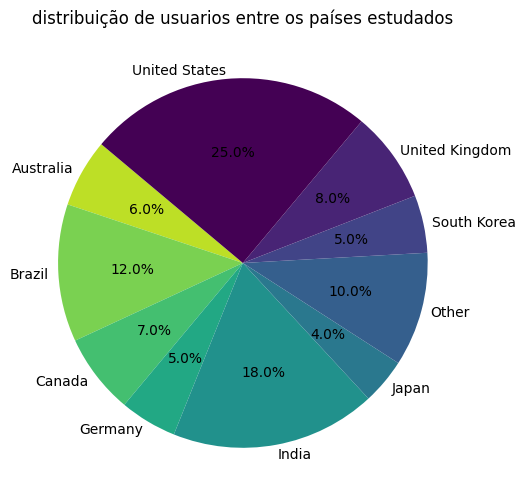

In [ ]:
paises_count = df_raw.groupby('country').country.count()
plt.figure(figsize=(10,6))
plt.pie(paises_count, autopct='%1.1f%%', startangle=140,labels= paises_count.index,colors = plt.cm.viridis(np.linspace(0.9, 0, 10)), labeldistance=1.05)
plt.title('distribuição de usuários entre os países estudados')
plt.show()

## Gráfico de relação entre idade dos usuarios e exercícios físico 

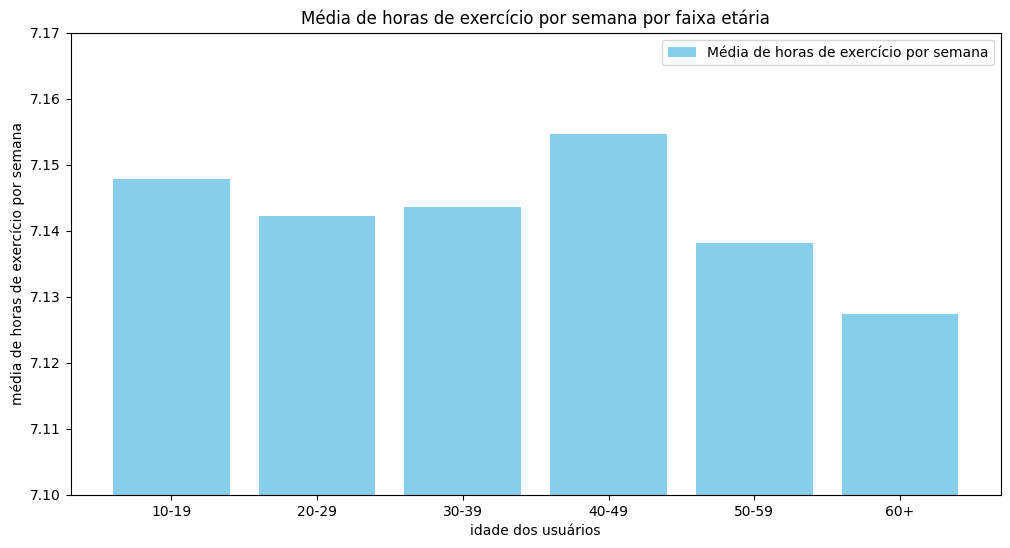

In [69]:
plt.figure(figsize=(12,6))
bins = [10,20,30,40,50,60,70]
labels = ['10-19','20-29','30-39','40-49','50-59','60+']
df_raw['age_group'] = pd.cut(df_raw['age'], bins=bins, labels=labels)
exer_por_idd = df_raw.groupby('age_group', observed=True)['exercise_hours_per_week'].mean()
plt.bar(exer_por_idd.index,exer_por_idd.values, color='skyblue',)
plt.ylim(7.10,7.17)
plt.xlabel("idade dos usuários") 
plt.ylabel("média de horas de exercício por semana")
plt.title("Média de horas de exercício por semana por faixa etária")
plt.legend(['Média de horas de exercício por semana'])
plt.show()

## Gráfico de sedentarismo em comparação ao total de usuários por faixa etária

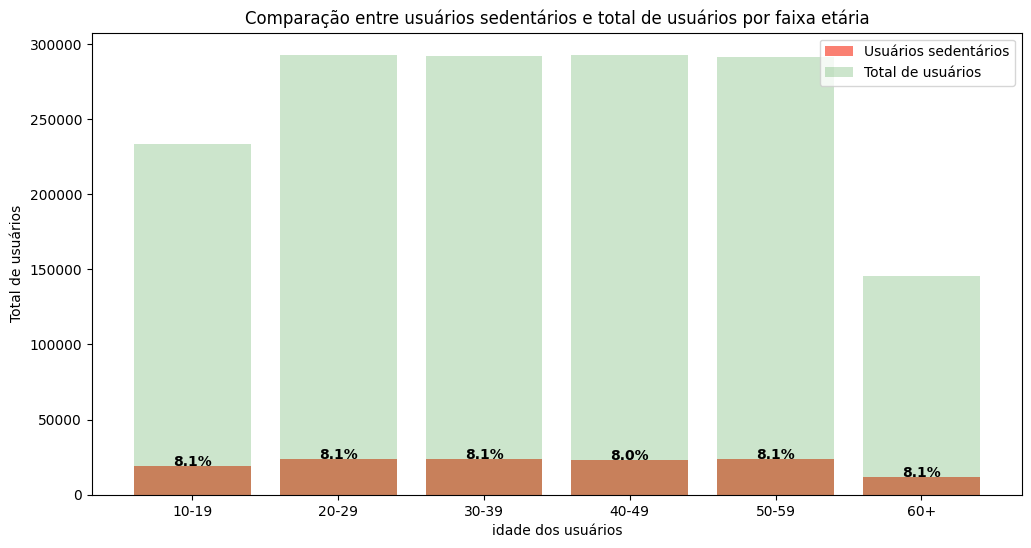

In [67]:
plt.figure(figsize=(12,6))
df_raw['seden'] = df_raw['exercise_hours_per_week'] <= 2
df_raw['seden_total'] = df_raw[df_raw['seden'] == True]['exercise_hours_per_week']
idd_seden = df_raw.groupby('age_group',observed=True)['seden_total'].count() 
per = (idd_seden / df_raw.groupby('age_group',observed=True)['exercise_hours_per_week'].count()) * 100
plt.bar(idd_seden.index, idd_seden.values, color='salmon')
idd_total = df_raw.groupby('age_group',observed=True)['exercise_hours_per_week'].count()
plt.bar(idd_total.index, idd_total.values, color='green', alpha=0.2)
for i, valor_percentual in enumerate(per):
    plt.text(i, idd_seden.values[i] + 1, f'{valor_percentual:.1f}%', 
             ha='center', fontsize=10, fontweight='bold')
plt.xlabel("idade dos usuários") 
plt.ylabel("Total de usuários")
plt.title("Comparação entre usuários sedentários e total de usuários por faixa etária")
plt.legend(['Usuários sedentários', 'Total de usuários'])
plt.show()

## RELAÇÃO DE PAÍSES QUE MAIS FUMAM

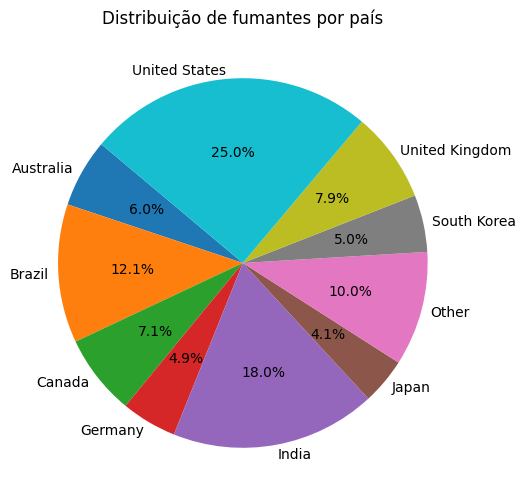

In [ ]:
df_fumantes = df_raw[df_raw['smoking'] == 'Yes']

fumantes_paises = df_fumantes.groupby('country').country.count()

plt.figure(figsize=(10, 6))
plt.pie(
    fumantes_paises,
    autopct='%1.1f%%',
    startangle=140,
    labels=fumantes_paises.index,
    labeldistance=1.05
)
plt.title('Distribuição de fumantes por país')
plt.show()



## Fumantes por faixa etária

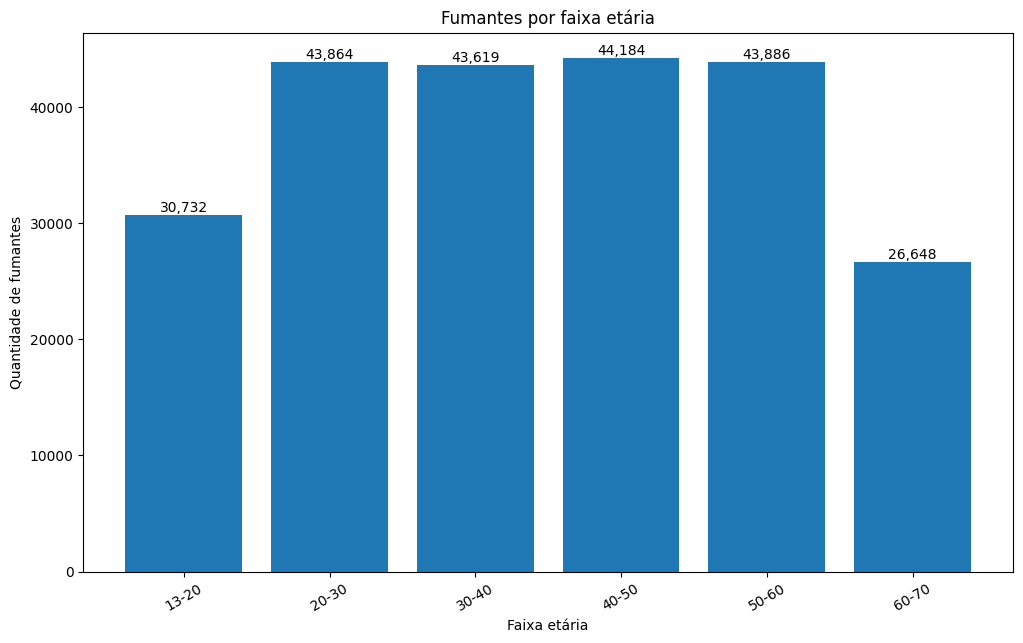

In [48]:
bins = [13, 20, 30, 40, 50, 60, 90]
labels = ['13-20', '20-30', '30-40', '40-50', '50-60', '60-70']

df_fumantes = df_raw.loc[df_raw['smoking'].str.lower() == 'yes'].copy()

df_fumantes['faixa_etaria'] = pd.cut(
    df_fumantes['age'],
    bins=bins,
    labels=labels,
    right=False
)

fumantes_idade = df_fumantes['faixa_etaria'].value_counts().sort_index()

plt.figure(figsize=(12, 7))
bars = plt.bar(fumantes_idade.index, fumantes_idade.values)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,}',
        ha='center',
        va='bottom'
    )

plt.title('Fumantes por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade de fumantes')
plt.xticks(rotation=30)
plt.show()



## Verificando possíveis falhas na coleta de dados de fumantes

In [56]:
qtd_menores = int((df_fumantes['age'] < 18).sum())
print("A quantidade de menores que fumam é de:",qtd_menores)


A quantidade de menores que fumam é de: 21992


Foram encontrados 21992 registros de fumantes menores de 18 anos na base de dados, indicando possível erro de coleta.

## RELAÇÃO ENTRE OS TOP 5 PAÍSES QUE MAIS FUMAM E A FAIXA ETÁRIA

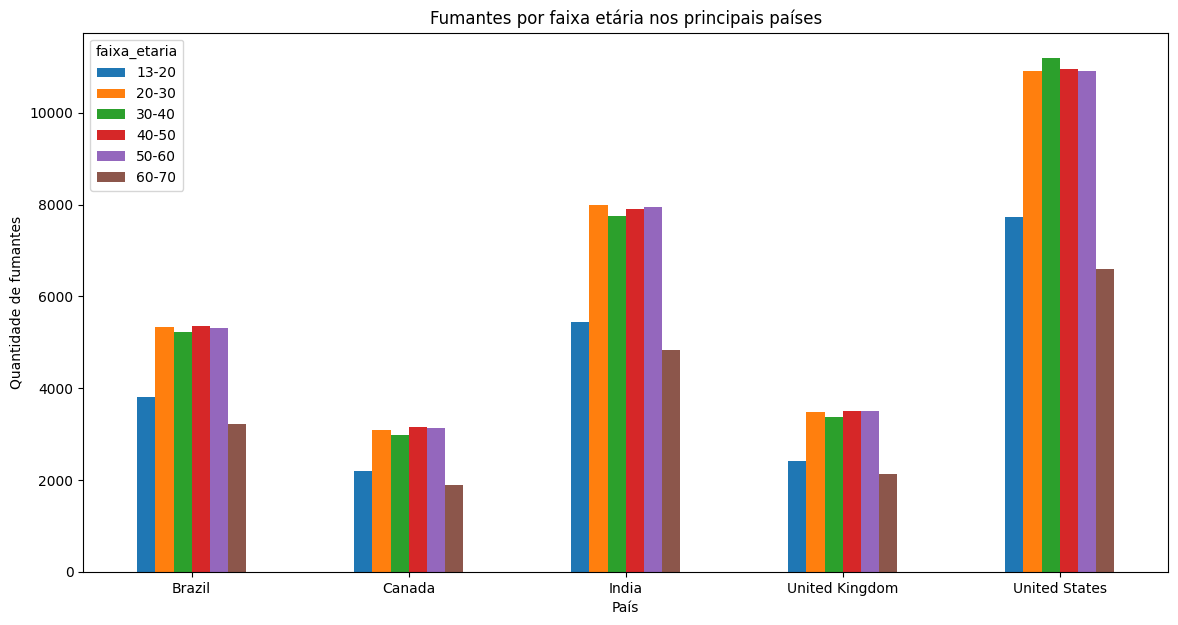

In [57]:
df_fumantes_sem_other = df_fumantes[df_fumantes['country'] != 'Other']

top_paises = (
    df_fumantes_sem_other['country']
    .value_counts()
    .head(5)
    .index
)

df_top = df_fumantes_sem_other[
    df_fumantes_sem_other['country'].isin(top_paises)
]

tabela_top = pd.crosstab(df_top['country'], df_top['faixa_etaria'])

tabela_top.plot(kind='bar', figsize=(14, 7))
plt.title('Fumantes por faixa etária nos principais países')
plt.xlabel('País')
plt.ylabel('Quantidade de fumantes')
plt.xticks(rotation=0)
plt.show()

## Países que mais clicam em anuncios 

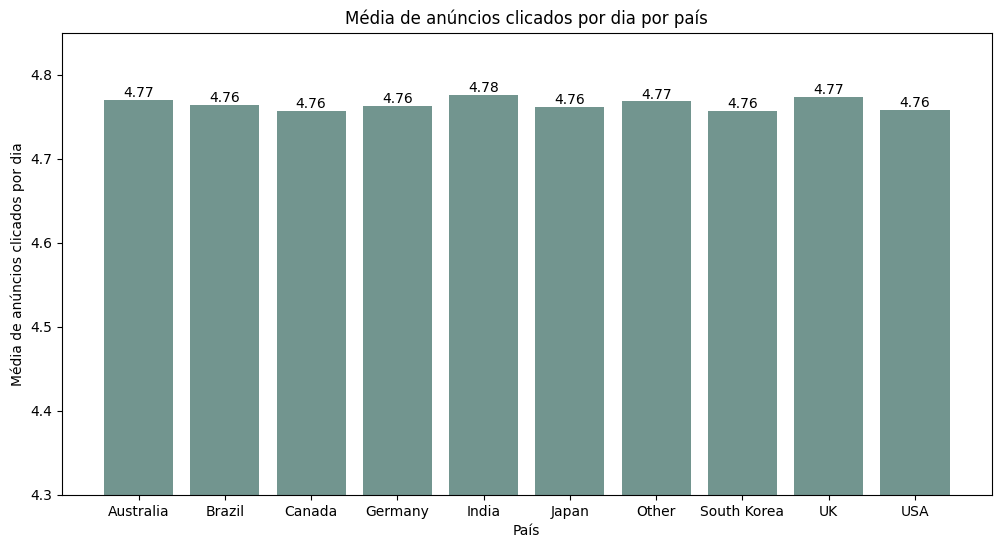

In [88]:
plt.figure(figsize=(12,6))
df_raw['country'] = df_raw['country'].replace({'United Kingdom': 'UK', 'United States': 'USA'})
anum_c = df_raw.groupby('country')['ads_clicked_per_day'].mean()
resul = plt.bar(anum_c.index, anum_c.values, color="#376860", alpha=0.7)
for num in resul:
    height = num.get_height()
    plt.text(
        num.get_x() + num.get_width() / 2,
        height,
        f'{height:1.2f}',
        ha='center',
        va='bottom'
    )
plt.ylim(4.3,4.85)
plt.xlabel("País") 
plt.ylabel("Média de anúncios clicados por dia")
plt.title("Média de anúncios clicados por dia por país")
plt.show()

## Faixa etária que mais clica em anuncios

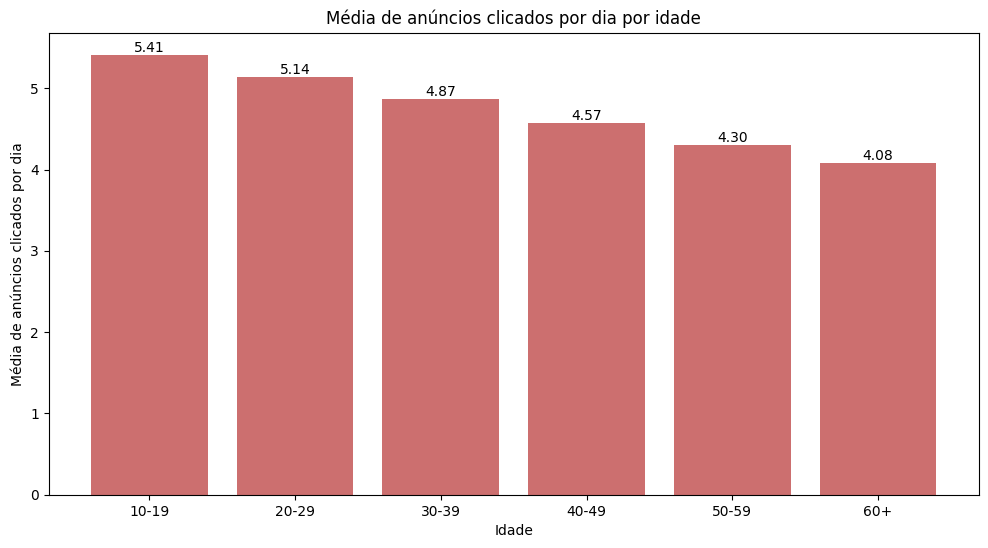

In [92]:
plt.figure(figsize=(12,6))
anum_id = df_raw.groupby('age_group', observed=True)['ads_clicked_per_day'].mean()
resul = plt.bar(anum_id.index, anum_id.values, color="#B73232", alpha=0.7)
for num in resul:
    height = num.get_height()
    plt.text(
        num.get_x() + num.get_width() / 2,
        height,
        f'{height:1.2f}',
        ha='center',
        va='bottom'
    )
plt.xlabel("Idade") 
plt.ylabel("Média de anúncios clicados por dia")
plt.title("Média de anúncios clicados por dia por idade")
plt.show()